In [1]:
import cuadraturas
import Integrals
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## Completados:

6, 10, 7, 17, 18

## Revisar:

19

## Completar

3,5,19

----

Problemas parcial 2

Ejercicios: Raíces de polinomios 5

Ejercicios: Integración: 1,3,6,7,10,17,18,19

Teoricos:
* 1
* 3

Computacionales:
* 10 (Sympy)
* 17 (Gauss-Laguerre)
* 18 (Gauss Hermite)
* 19 (Gauss Legendre)

# **Raices de polinomios**

### **Ejercicio 5**

In [ ]:
cuadraturas.Get

# **Integracion**

### **Ejercicio 1**

$I = \int_a^b f(x)dx \cong \int_a^b p_1(x)dx = \frac{b-a}{2}(f(a)+f(b))$

Dem: 

Sabemos que $f(x)\cong p_1(x) = \frac{x-b}{a-b}f(a) + \frac{x-a}{b-a}f(b), \forall x\in [a,b]$ (inteporlación de legendre con soporte de dos elementos).

Entonces 

\begin{equation}
\begin{split}
\int_a^b f(x)dx \cong \int_a^b p_1(x)dx &= \frac{f(a)}{a-b}\big(\frac{b^2}{2}-\frac{a^2}{2}-b^2+ab\big) +\frac{f(b)}{b-a}\big(\frac{b^2}{2}-\frac{a^2}{2}-ab+a^2\big) \\
 & = \frac{f(a)}{b-a}\big(ab-\frac{b^2}{2}-\frac{a^2}{2}\big) + \frac{f(b)}{b-a}\big(\frac{b^2}{2}+\frac{a^2}{2}-ab\big) \\
 &=\frac{f(a)}{b-a}\big(\frac{1}{2}(b-a)^2\big)+\frac{f(b)}{b-a}\big(\frac{1}{2}(b-a)^2\big) \\
 &= \frac{(b-a)^2}{2(b-a)}\big(f(a)+f(b)\big) \\
 &= \frac{b-a}{2}\big(f(a)+f(b)\big)
\end{split}
\end{equation}

### **Ejercicio 3**

### **Ejercicio 6**

In [2]:
import Integrals

In [3]:
def funcion(x):
    R = 0.5
    a = 0.01
    numerador = np.sqrt((a**2)-(x**2))
    denominador = R+x
    return numerador/denominador

In [4]:
N = 100
a = 0.01
x = np.linspace(-0.01,0.01,N)
y = funcion(x)
f = funcion

In [5]:
Simpson = Integrals.Simpson(x,f)

In [6]:
anvalue = np.pi*(0.5-np.sqrt((0.5**2)-(a**2)))
print(f"Valor analitico de la integral: {anvalue}")

Valor analitico de la integral: 0.0003141906875702543


In [7]:
error = np.abs(Simpson.Simple()-anvalue)
print("Simpson 1/3:")
print(f"Integral con Simpson (1/3): {Simpson.Simple()}")
print(f"Error con Simpson (1/3): {error}")

Simpson 1/3:
Integral con Simpson (1/3): 5.387205387205376e-06
Error con Simpson (1/3): 0.00030880348218304893


In [8]:
#Integral usando Trapecio
Trapecio = Integrals.Integrator(x,f)
error = np.abs(Trapecio.GetIntegral()-anvalue)
print(f"Trapecio:\nIntegral: {Trapecio.GetIntegral()}")
print(f"Error con Trapecio: {error}")

Trapecio:
Integral: 0.0003139164964308314
Error con Trapecio: 3.3759580442608e-07


### **Punto 7**

Calcular el volumen de una semiesfera de radio R=1

In [9]:
def semiesfera(x,y):
    if x**2+y**2<=1:
        return np.sqrt(x**2+y**2)
    else:
        return 0

In [10]:
#Meshgrid the 5x5
x,y = np.mgrid[-1:1:500j,-1:1:500j]

In [11]:
Areasq = (x[1,1]-x[0,0])*(y[1,1]-y[0,0])

In [12]:
coord_values ={}
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        x_vertex = x[i, j]
        y_vertex = y[i, j]
        value = semiesfera(x_vertex, y_vertex)
        coord_values[(i,j)] = value
        

In [13]:
def mean_at_sq(i,j):
    suma = coord_values[(i,j)] + coord_values[(i+1,j+1)] + coord_values[(i+1,j)] + coord_values[(i,j+1)]
    return suma/4

In [14]:
volume = 0
for i in range(len(x)-1):
    for j in range(len(y)-1):
        volume+=Areasq*mean_at_sq(i,j)

In [ ]:
print(f"Volumen aproximado: {volume}")

### **Ejercicio 10**

In [16]:
x = sym.Symbol('x',real=True)
h = sym.Symbol('h', real=True)

Tenemos que $E =\frac{f^{(4)}(\zeta)}{24}\int_0^{3h}(x)(x-h)(x-2h)(x-3h)dx $

In [17]:
def funcion(x,h):
    return x*(x-h)*(x-2*h)*(x-3*h)

Usamos Sympy para calcular $\int_0^{3h}(x)(x-h)(x-2h)(x-3h)dx$

Lo cual es igual a 

In [18]:
sym.integrate(funcion(x,h), (x, 0, 3*h))

-9*h**5/10

Entonces  $E = \frac{f^{(4)}(\zeta)}{24}\int_0^{3h}(x)(x-h)(x-2h)(x-3h)dx = \frac{f^{(4)}(\zeta)}{24}\cdot \frac{-9h^5}{10} = \frac{f^{(4)}(\zeta)}{24}\cdot \frac{-9h^5}{10} = \frac{-3h^5f^{4}(\zeta)}{80}$

### **Ejercicio 17**

**a)**

In [19]:
def funcion(x):
    return (x**3)/(np.exp(x)-1)*np.exp(x)

In [20]:
raices = cuadraturas.GetAllRootsGlag(3)
pesos = cuadraturas.GetWeightsGLag(3)

Aproximacion con el **tercer** polinomio de Laguerre

In [21]:
sum(pesos*funcion(raices)) #valor exacto 6.493939402266828

6.481130171540032

**b)**

In [22]:
exact_value = np.pi**4/15
rel_errores = np.array([])
for n in range(2,11):
    raices = cuadraturas.GetAllRootsGlag(n)
    pesos = cuadraturas.GetWeightsGLag(n)
    aprox = sum(pesos*funcion(raices))
    error = aprox/exact_value
    rel_errores = np.append(rel_errores,error)

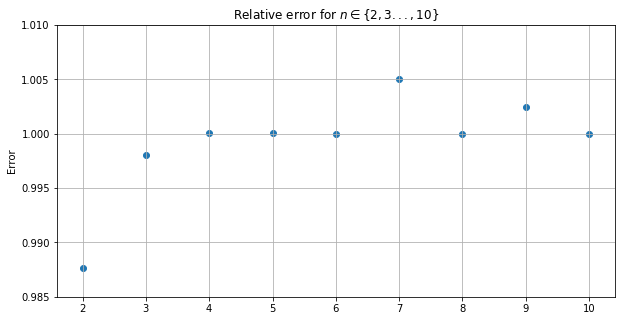

In [23]:
fig, ax = plt.subplots(figsize= (10,5))
x = np.array([i for i in range(2,11)])
ax.scatter(x,rel_errores)
ax.set_title(r"Relative error for $n \in\{2,3...,10\}$")
ax.set_ylabel("Error")
plt.ylim(0.985,1.010)
plt.grid()

### **Ejercicio 18**

a)

Pesos del polinomio de Hermite de grado 20

In [24]:
cuadraturas.GetWeightsGHer(20)

array([2.22939365e-13, 4.39934099e-10, 1.08606937e-07, 7.80255648e-06,
       2.28338636e-04, 3.24377334e-03, 2.48105209e-02, 1.09017206e-01,
       2.86675505e-01, 4.62243670e-01, 4.62243670e-01, 2.86675505e-01,
       1.09017206e-01, 2.48105209e-02, 3.24377334e-03, 2.28338636e-04,
       7.80255648e-06, 1.08606937e-07, 4.39934099e-10, 2.22939365e-13])

Raices del polinomio de Hermite de grado 20

In [ ]:
cuadraturas.GetAllRootsGHer(20)

b)

In [ ]:
def funcion(x):
    p = 0.5*(1/np.pi**0.5)*4*x**2
    return p*x**2

In [ ]:
roots = cuadraturas.GetAllRootsGHer(5) #raiz de poly hermite grado 5
weights = cuadraturas.GetWeightsGHer(5) #peso de poly hermite grado 5

In [ ]:
np.sum(weights*funcion(roots))

### **Ejercicio 19**

a)

In [ ]:
def funcion(T,banda):
    argumento = np.sqrt(x**2+banda**2)
    numerador = 0.5*np.tanh(argumento)*300/(2*T)
    denominador = argumento
    return numerador/denominador

b)

In [ ]:
n = 50
Roots, Weights = np.polynomial.legendre.leggauss(n)

c)

In [ ]:
T = np.linspace(1,20,190000)

d)

In [ ]:
if np.abs(I-1/0.3)< 1e-4: